In [2]:
import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt

from pathlib import Path

# Notebook Lecture on Neuroimaging

Please download [this drive](https://drive.google.com/drive/folders/17qbJmfSec73f0d1IWowKMWecfksHBRtx?usp=drive_link) to get the example files.

In [3]:
# Change this path to run the examples

source_path = Path('/home/lenkeiuser/Documents/JC/1_DATA/2023-06-14_python-course/2024_python-course_NI/hungary')

# Loads the image

In [4]:
def read_nifti(file_name):
    
    """
    loads a nifti file
    
    inputs:
    file_name (str or path)                   Path to the file
    
    returns:
    img: nibabel.Nifti1image                  Image object
    [X,Y,Z,T]: np.array(int)                  Image shape    
    """
    
    img = nib.load(file_name)
    
    return img, img.shape

In [5]:
# open image

# Path to your image
file_name = source_path / Path('sub-Kremes/ses-CtrlH/func/sub-Kremes_ses-CtrlH_task-stim_run-01_pd2dt.nii.gz')

img, [X,Y,Z,T] = read_nifti(file_name)

print(f'Image loaded\nX: {X}, Y: {Y}, Z: {Z}, T:{T}')

Image loaded
X: 128, Y: 1, Z: 91, T:3600


In [6]:
# open mask

# Path to image mask 
mask_name = source_path / Path('sub-Kremes/ses-CtrlH/func/sub-Kremes_ses-CtrlH_task-stim_run-01_mask.nii.gz')

mask_img, [X,Y,Z] = read_nifti(mask_name)

print(f'Mask loaded\nX: {X}, Y: {Y}, Z: {Z}')

Mask loaded
X: 128, Y: 1, Z: 91


In [7]:
# Checks header

for field in img.header:
    
    print(f'{field:<18} : {img.header[field]}')

sizeof_hdr         : 348
data_type          : b''
db_name            : b''
extents            : 0
session_error      : 0
regular            : b'r'
dim_info           : 0
dim                : [   4  128    1   91 3600    1    1    1]
intent_p1          : 0.0
intent_p2          : 0.0
intent_p3          : 0.0
intent_code        : 0
datatype           : 16
bitpix             : 32
slice_start        : 0
pixdim             : [-1.    0.11  0.4   0.1   0.5   0.    0.    0.  ]
vox_offset         : 0.0
scl_slope          : nan
scl_inter          : nan
slice_end          : 0
slice_code         : 0
xyzt_units         : 10
cal_max            : 267.5986328125
cal_min            : 3.3584582805633545
slice_duration     : 0.0
toffset            : 0.0
glmax              : 0
glmin              : 0
descrip            : b''
aux_file           : b''
qform_code         : 1
sform_code         : 0
quatern_b          : 0.0
quatern_c          : 0.0
quatern_d          : 0.0
qoffset_x          : 0.0
qoffset_y     

In [8]:
# Just the fields of interest

fields_of_interest = ['dim', 'pixdim', 'srow_x', 'srow_y', 'srow_z']

for field in fields_of_interest:
    
    print(f'{field:<18} : {img.header[field]}')

dim                : [   4  128    1   91 3600    1    1    1]
pixdim             : [-1.    0.11  0.4   0.1   0.5   0.    0.    0.  ]
srow_x             : [0. 0. 0. 0.]
srow_y             : [0. 0. 0. 0.]
srow_z             : [0. 0. 0. 0.]


In [9]:
# Check the affine

print(img.affine)

[[ 0.11        0.          0.          0.        ]
 [ 0.          0.40000001  0.          0.        ]
 [ 0.          0.         -0.1         0.        ]
 [ 0.          0.          0.          1.        ]]


In [10]:
# Check the shapes

print(f'image: {img.header["dim"]}\nmask: {mask_img.header["dim"]}')

image: [   4  128    1   91 3600    1    1    1]
mask: [  3 128   1  91   1   1   1   1]


In [11]:
# Compare the affines

print(f'image: \n{img.affine}\nmask: \n{mask_img.affine}')

image: 
[[ 0.11        0.          0.          0.        ]
 [ 0.          0.40000001  0.          0.        ]
 [ 0.          0.         -0.1         0.        ]
 [ 0.          0.          0.          1.        ]]
mask: 
[[ 0.11        0.          0.          0.        ]
 [ 0.          0.40000001  0.          0.        ]
 [ 0.          0.         -0.1         0.        ]
 [ 0.          0.          0.          1.        ]]


## display images

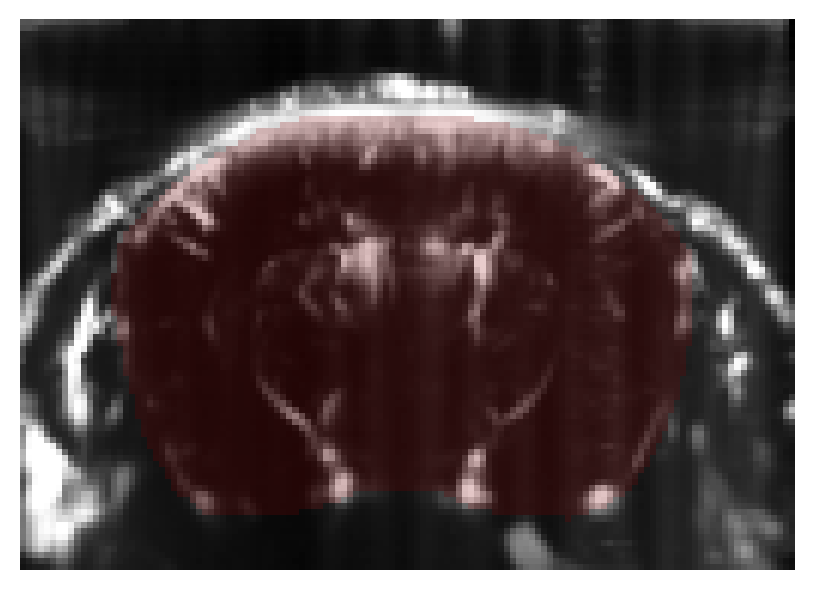

In [12]:
# Custom plot

def display_image(img_2_display, mask_img_2_display = None, vmin = 0.7, vmax = 1.6, alpha_factor = 0.2):
    
    """
    diplays an image and an overlay with transparency
    
    inputs:
    img_2_display: 2D numpy.array                      Image to display
    mask_img_2_display: 2D numpy.array                 Image to overlay
    vmin: float                                        Low aturation value of background image    
    vmax: float                                        High Saturation value of background image    
    alpha_factor: float                                transparency of the overlay
    """
    
    fig, ax = plt.subplots(1,1, figsize = (5,7), dpi = 200)
    
    ax.imshow(
        np.rot90(np.log10(img_2_display),3), 
        cmap = 'Greys_r',
        vmin = vmin,
        vmax = vmax
    )
    
    if mask_img_2_display is not None:
        
        alpha = alpha_factor*(mask_img_2_display>0).astype(float)
        
        ax.imshow(np.rot90(alpha,3), cmap = 'hot', vmax = 1, alpha = np.rot90(alpha,3))
        
    ax.axis('off')
        
    return

display_image(
    img.get_fdata().mean(-1).squeeze(),
    mask_img.get_fdata().squeeze()
)

/home/lenkeiuser/anaconda3/envs/JCpyfus/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  im = getattr(ax, type)(data_2d.copy(),
/home/lenkeiuser/anaconda3/envs/JCpyfus/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:49: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  self.ax.axis(self.get_object_bounds())
/home/lenkeiuser/anaconda3/envs/JCpyfus/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  im = getattr(ax, type)(data_2d.copy(),
/home/lenkeiuser/anaconda3/envs/JCpyfus/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:49: UserWarning: Attempting to set identical bottom == top == 0.0 results in sing

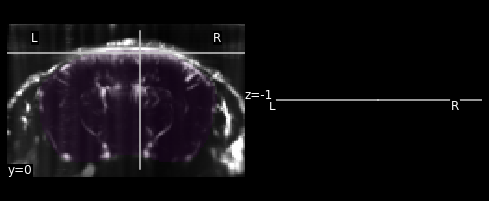

In [13]:
# nilearn plot

from nilearn.plotting import plot_anat
from nilearn.image import mean_img, math_img

display = plot_anat(math_img("np.log10(a)", a=mean_img(img)), vmin = 0.7, vmax = 1.6)
display.add_overlay(mask_img, alpha = 0.2)

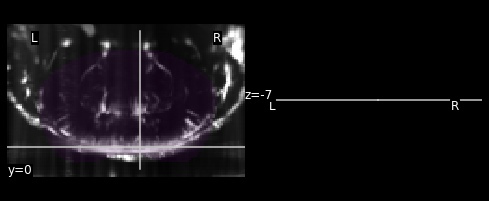

In [14]:
# Messing up with the image

local_img = math_img("np.flip(a,2)", a = math_img("np.log10(a)", a=mean_img(img)))

display = plot_anat(local_img, vmin = 0.7, vmax = 1.6)
display.add_overlay(mask_img, alpha = 0.2)

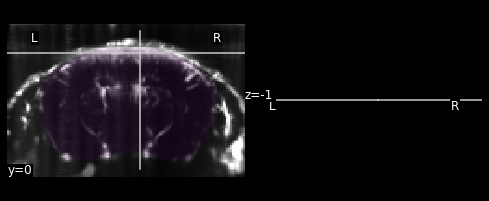

In [15]:
# Correcting the affine

# flip the third dimension
new_affine = np.diag([1,1,-1,1])@local_img.affine
# translate the third dimension
new_affine[2,-1] = new_affine[-1, 2]-Z*local_img.header.get_zooms()[2]

local_img_2 = nib.Nifti1Image(
    local_img.get_fdata(), 
    affine = new_affine
)

# Displaying the corrected image

display = plot_anat(local_img_2, vmin = 0.7, vmax = 1.6)
display.add_overlay(mask_img, alpha = 0.2)

# First order statistics

## Correlation analysis

In [17]:
# open image

file_name = source_path / Path('sub-Kremes/ses-CtrlH/func/sub-Kremes_ses-CtrlH_task-stim_run-01_pd2dt.nii.gz')
mask_name = source_path / Path('sub-Kremes/ses-CtrlH/func/sub-Kremes_ses-CtrlH_task-stim_run-01_mask.nii.gz')

img, [X,Y,Z,T] = read_nifti(file_name)

print(f'Image loaded\nX: {X}, Y: {Y}, Z: {Z}, T:{T}')

mask_img, [X,Y,Z] = read_nifti(mask_name)

print(f'Mask loaded\nX: {X}, Y: {Y}, Z: {Z}')

Image loaded
X: 128, Y: 1, Z: 91, T:3600
Mask loaded
X: 128, Y: 1, Z: 91


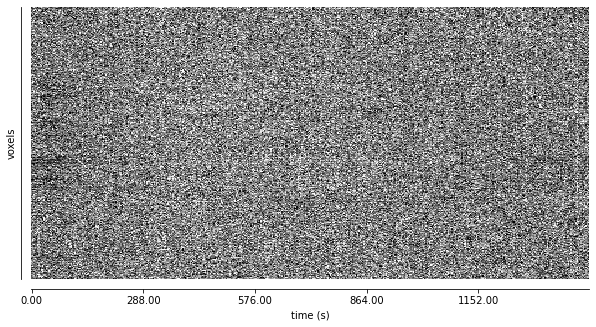

In [18]:
# Display proper

from nilearn.plotting import plot_carpet

_ = plot_carpet(img, mask_img = mask_img, t_r = 0.4)

In [19]:
# Custom display

from nilearn.masking import apply_mask, unmask

signals = apply_mask(img, mask_img)

print(signals.shape)

(3600, 5340)


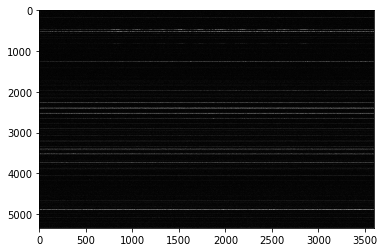

In [20]:
# Weird

plt.imshow(np.rot90(signals), interpolation = 'none', cmap = 'Greys_r', aspect = 'auto')

In [21]:
# Normalise

signals_norm = (signals-signals.mean(0))/signals.std(0)

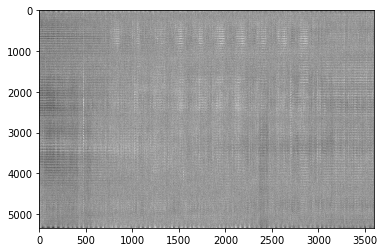

In [22]:
# smooth custom

plt.imshow(
    np.rot90(signals_norm), 
    cmap = 'Greys_r', 
    aspect = 'auto', 
    vmin = -2, 
    vmax = 2
)

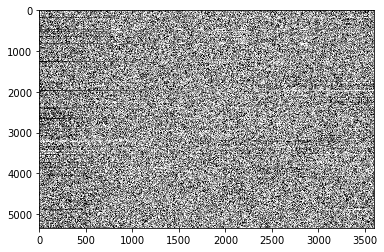

In [23]:
# Proper is not always that proper

plt.imshow(
    np.rot90(signals_norm), 
    cmap = 'Greys_r', 
    aspect = 'auto', 
    interpolation = 'none',
    vmin = -2, 
    vmax = 2
)

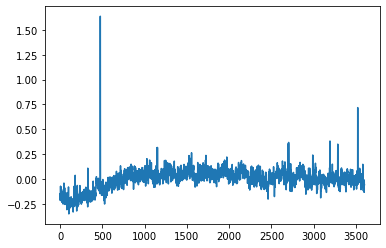

In [24]:
# Looking at global signal

plt.plot(signals_norm.mean(1))

In [25]:
# proper detrend

from scipy.signal import detrend

signals_detrend = detrend(signals_norm, type = 'linear', axis = 0)

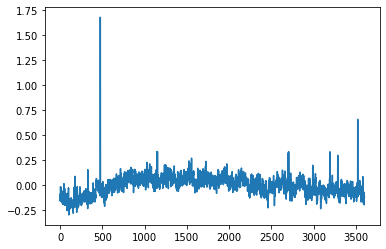

In [26]:
# not so proper

plt.plot(signals_detrend.mean(1))

In [27]:
# Custom detrend

def detrend_poly(signals, deg = 3):
    
    """
    detrend signal following a third degree polynom
    
    inputs:
    signals: 2D np.array           Signals extracted from a mask (nb_data_points x nb_voxels)
    deg: int                       Degree of polynom to detrend
    
    returns:
    2D np.array                    Signals detrended (nb_data_points x nb_voxels)
    """
    
    [T,nb_vox] = signals.shape
    
    # For stability it is recommended to estimate a polynom correction between -1 and 1
    
    x = np.linspace(-1, 1, T)

    p = np.polyfit(x, signals, deg)
    poly_fit = np.array([np.polyval(p_i, x) for p_i in p.T]).T
    
    return signals-poly_fit

signals_detrend = detrend_poly(signals_norm)
# normalised version
signals_detrend_norm = (signals_detrend-signals_detrend.mean(0))/signals.std(0)

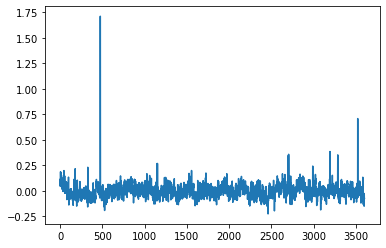

In [28]:
# detrended signal

plt.plot(signals_detrend.mean(1))

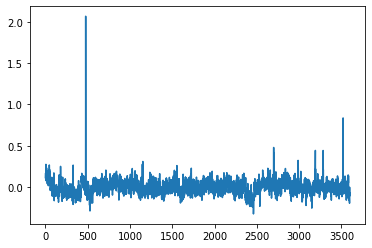

In [29]:
# detrended signal

plt.plot(signals_detrend_norm.mean(1))

In [30]:
# Lets go back to images

img_norm = unmask(signals_norm, mask_img)
img_detrend = unmask(signals_detrend, mask_img)
img_detrend_norm = unmask(signals_detrend_norm, mask_img)

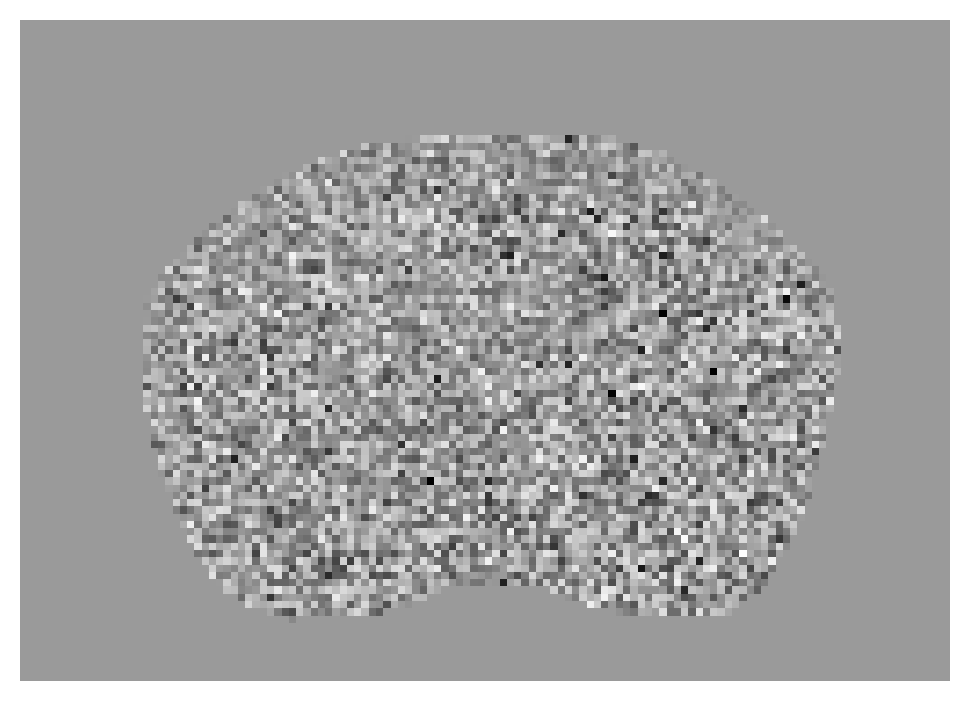

In [31]:
# Custom display

def display_fus_img(img, fig = None, ax = None):
    
    if not fig:
        
        fig = plt.figure(figsize = (6,5), dpi = 200)
        
    if not ax:
        
        ax = fig.gca()        
    
    img_0 = np.flip(img.get_fdata().squeeze().mean(2), 1)
        
    ax.imshow(np.rot90(img_0), cmap = 'Greys_r')
    ax.axis('off')
    
    return fig, ax
    
# Normalised

_ = display_fus_img(img_norm)

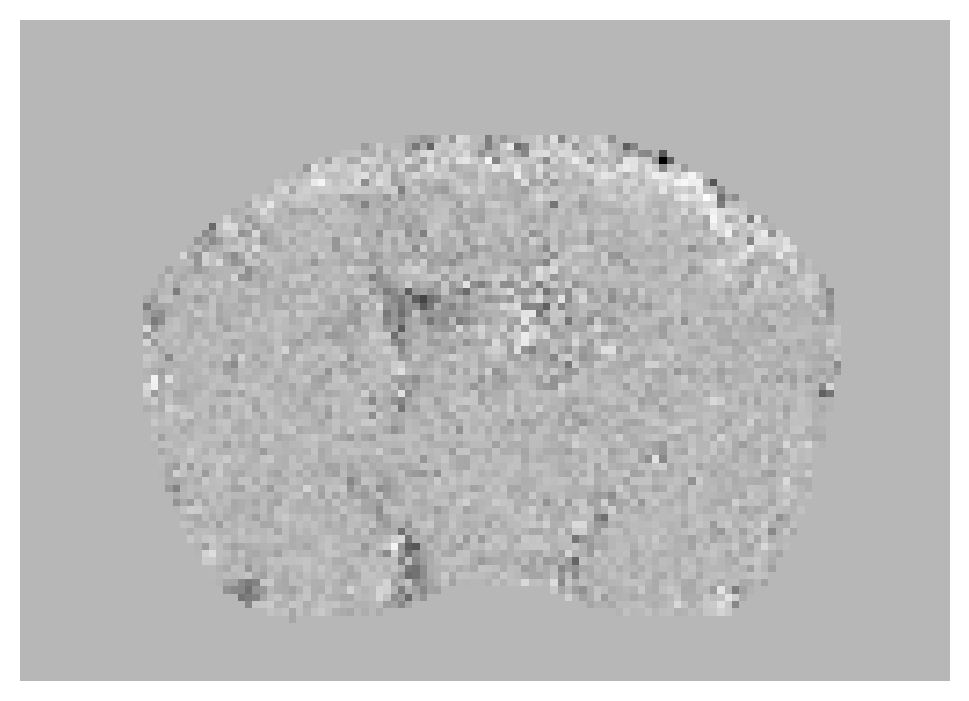

In [32]:
# Detrended

_ = display_fus_img(img_detrend)

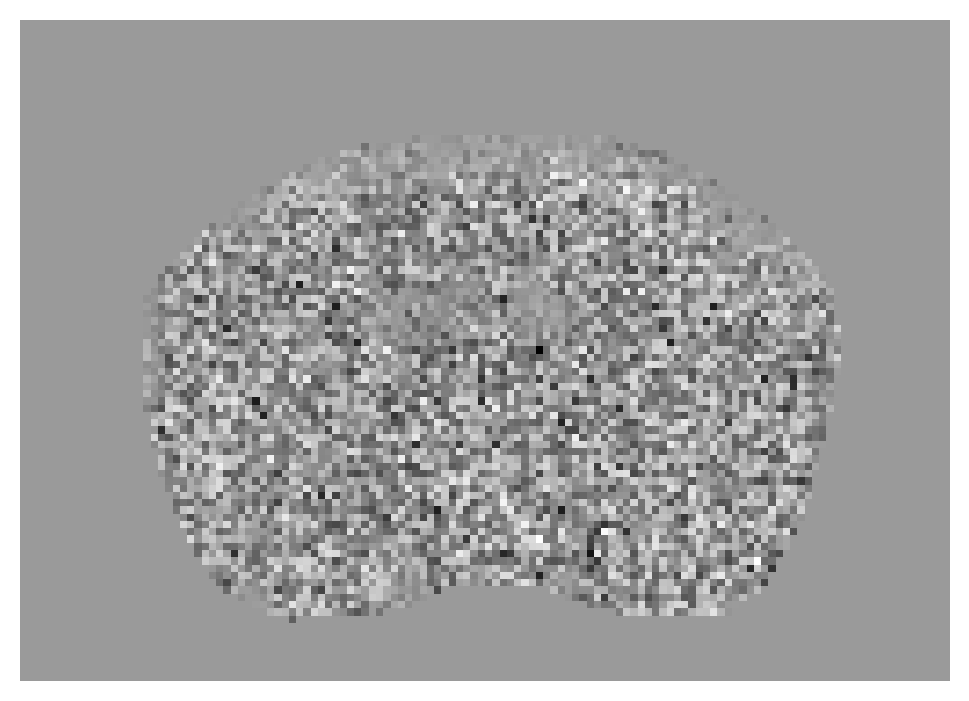

In [33]:
# Detrended normed

_ = display_fus_img(img_detrend_norm)

### Getting the stim

In [35]:
# Reading events file

from pandas import read_csv

fs = 2.5

csv_name = source_path / Path('sub-Kremes/ses-CtrlH/func/sub-Kremes_ses-CtrlH_task-stim_run-01_events.tsv')

events = read_csv(csv_name, delimiter = '\t')
events

,onset,duration,trial_type
0,0,300.0,rest
1,300,30.0,active
2,330,60.0,rest
3,390,30.0,active
4,420,60.0,rest
5,480,30.0,active
6,510,60.0,rest
7,570,30.0,active
8,600,60.0,rest
9,660,30.0,active


In [36]:
# Building event regressor

event_signal = np.zeros(T)
for row in events.iterrows():
    
    if row[1].trial_type == 'active':

        event_signal[int(row[1].onset*fs):int(row[1].onset*fs)+int(row[1].duration*fs)] = 1

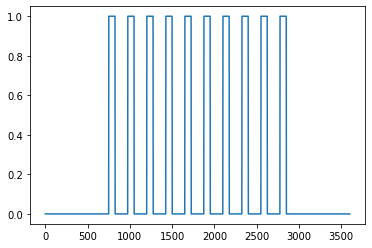

In [37]:
# plotting the stim

plt.plot(event_signal)

### Correlation map

In [38]:
# Computes correlation

cor_raw = [np.corrcoef(x, event_signal)[0,1] for x in signals.T]
cor_detrend = [np.corrcoef(x, event_signal)[0,1] for x in signals_detrend.T]

In [39]:
# Goes to images

amap_raw = unmask(cor_raw, mask_img).get_fdata().squeeze()
amap_detrend = unmask(cor_detrend, mask_img).get_fdata().squeeze()

(-0.5, 127.5, 90.5, -0.5)

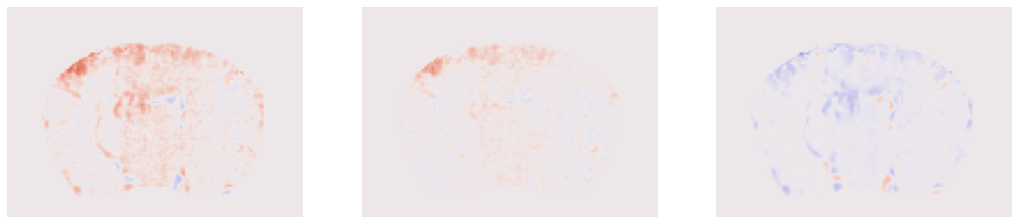

In [40]:
# Fancy display => Colorcet is life 

import colorcet as cc

nb_col = 3
nb_lin = 1

fig, ax = plt.subplots(nb_lin, nb_col, figsize = (nb_col*6, nb_lin*5))

ax[0].imshow(np.rot90(amap_raw,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)
ax[0].axis('off')

ax[1].imshow(np.rot90(amap_detrend,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)
ax[1].axis('off')

ax[2].imshow(np.rot90(amap_detrend-amap_raw,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)
ax[2].axis('off')

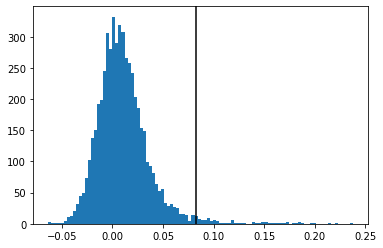

In [41]:
# A bit of stats

_ = plt.hist(cor_detrend, 100)

plt.axvline(np.percentile(cor_detrend, 98), c = 'k')

In [42]:
# Lets get an active zone

mask_active = np.zeros(len(cor_detrend))
mask_active[np.array(cor_detrend) > np.percentile(cor_detrend, 98)] = 1

img_mask_active = unmask(mask_active, mask_img)

(-0.5, 127.5, 90.5, -0.5)

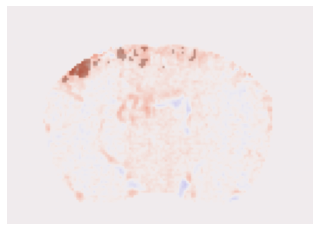

In [43]:
# What does the zone look like

plt.imshow(np.rot90(amap_raw,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)

img_1 = img_mask_active.get_fdata().squeeze()

plt.imshow(np.rot90(img_1,3), cmap = 'Greys', alpha = 0.2)
plt.axis('off')

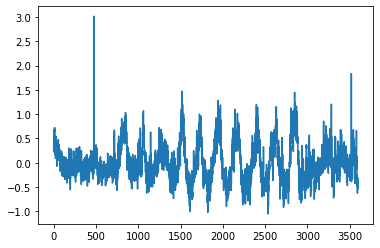

In [44]:
# some timeseries

active_signals = apply_mask(img_detrend, img_mask_active)

plt.plot(active_signals.mean(1))

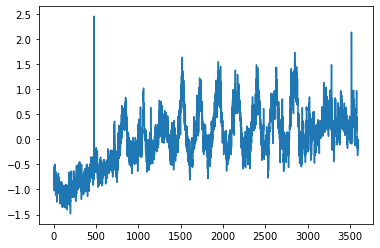

In [45]:
# some timeseries

active_signals = apply_mask(img_norm, img_mask_active)

plt.plot(active_signals.mean(1))

### Clean image

In [46]:
# all at once

from nilearn.image import smooth_img, high_variance_confounds, clean_img

confounds = high_variance_confounds(img, n_confounds=5, percentile=2.0, detrend=True, mask_img=mask_img)

img_cleaned = clean_img(
    smooth_img(img, fwhm=0.2), 
    mask_img = mask_img, 
    standardize = True,
    detrend = True,
    high_pass = 0.01,
    t_r = 1/fs,
    confounds = confounds
)

signals_clean = apply_mask(img_cleaned, mask_img)
cor_clean = [np.corrcoef(x, event_signal)[0,1] for x in signals_clean.T]
amap_clean = unmask(cor_clean, mask_img).get_fdata().squeeze()

(-0.5, 127.5, 90.5, -0.5)

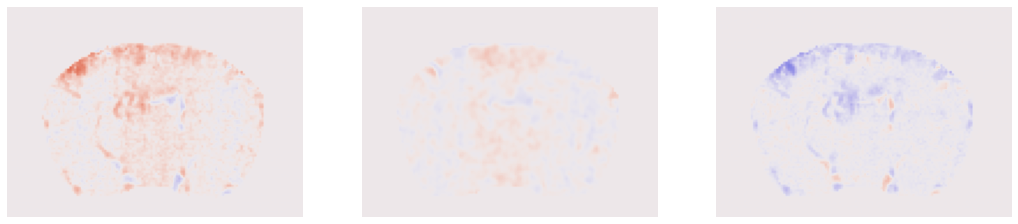

In [47]:
# might be slightly over processed

import colorcet as cc

nb_col = 3
nb_lin = 1

fig, ax = plt.subplots(nb_lin, nb_col, figsize = (nb_col*6, nb_lin*5))

ax[0].imshow(np.rot90(amap_raw,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)
ax[0].axis('off')

ax[1].imshow(np.rot90(amap_clean,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)
ax[1].axis('off')

ax[2].imshow(np.rot90(amap_clean-amap_raw,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)
ax[2].axis('off')

## GLM

In [48]:
# Nilearn

from nilearn.glm.first_level import compute_regressor, FirstLevelModel
from nilearn.glm.second_level import SecondLevelModel
from nilearn.plotting import plot_design_matrix
from nilearn.masking import apply_mask, unmask
from nilearn.image import high_variance_confounds

In [49]:
# creates and fit the model

t_r = 0.4

fus_glm = FirstLevelModel(
    t_r=t_r,
    noise_model="ar1",
    standardize=False,
    hrf_model="glover",
    drift_model="cosine",
    high_pass=0.01,
    mask_img = mask_img
)

# fus_glm = fus_glm.fit(img, events, confounds = None)
fus_glm = fus_glm.fit(img_detrend, events, confounds = None)

/home/lenkeiuser/anaconda3/envs/JCpyfus/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:61: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Text(0.5, 1.0, 'Design matrix')

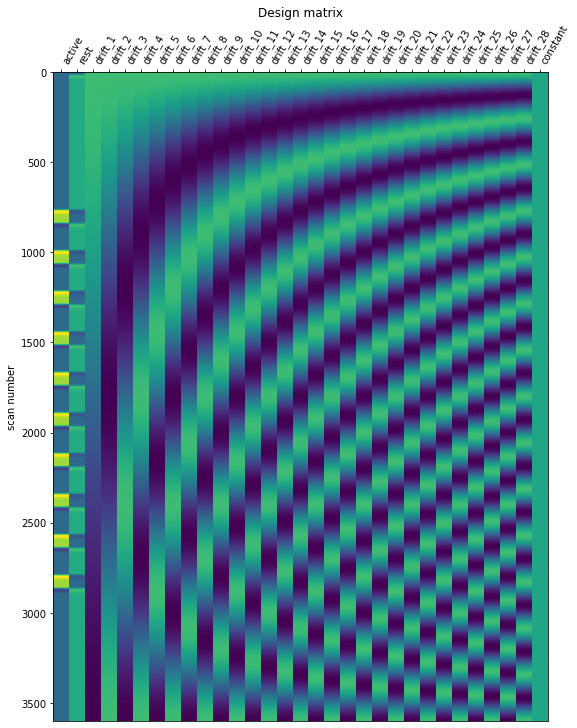

In [50]:
# displays the model

design_matrix = fus_glm.design_matrices_[0]

plot_design_matrix(design_matrix)

plt.title(f'Design matrix')

Text(0.5, 1.0, 'Z map')

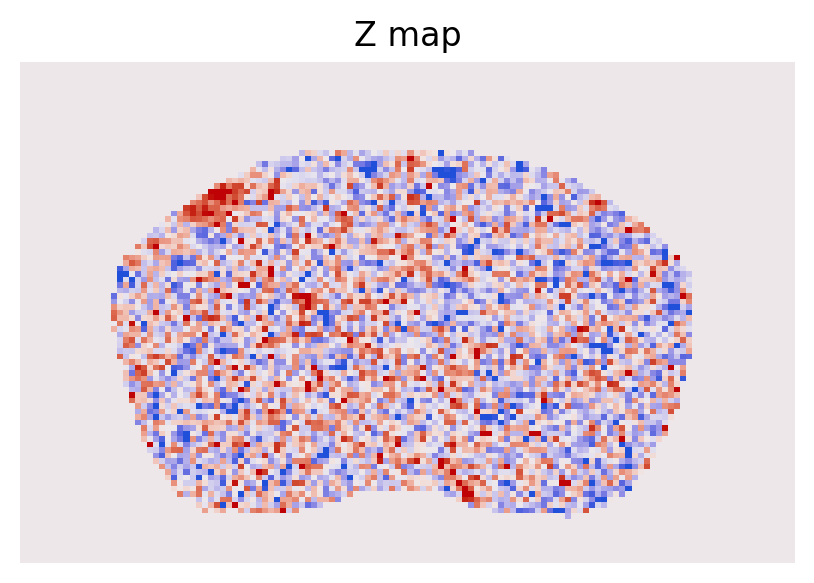

In [51]:
contrast_vector = np.zeros(design_matrix.shape[1])
contrast_vector[0] = 1

eff_map = fus_glm.compute_contrast(
    contrast_vector, output_type="effect_size"
)

z_map = fus_glm.compute_contrast(contrast_vector, output_type="stat")

plt.figure(figsize = (5,6), dpi = 200)

img_2_display = z_map.get_fdata().squeeze()

plt.imshow(np.rot90(img_2_display,3), cmap = cc.cm['CET_D1'], vmin = -2.1, vmax = 2.1, aspect = 0.1/0.11)
plt.axis('off')

plt.title(f'Z map')

# Second order statistics

In [ ]:
# Practicals 2.3

# Bonus human based

Example adapted from [nilearn](https://nilearn.github.io/stable/index.html)

In [77]:
# Load data

from nilearn.datasets import fetch_spm_auditory

subject_data = fetch_spm_auditory()
subject_data.func 

['/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00223_004.img',
 '/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00223_005.img',
 '/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00223_006.img',
 '/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00223_007.img',
 '/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00223_008.img',
 '/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00223_009.img',
 '/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00223_010.img',
 '/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00223_011.img',
 '/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00223_012.img',
 '/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00223_013.img',
 '/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00223_014.img',
 '/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00223_015.img',
 '/home/lenkeiuser/nilearn_data/spm_auditory/sub001/fM00223/fM00

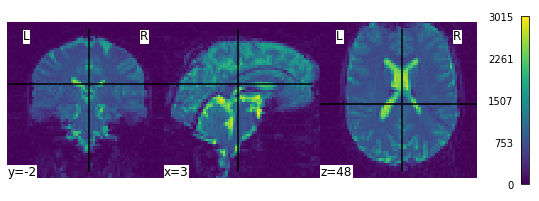

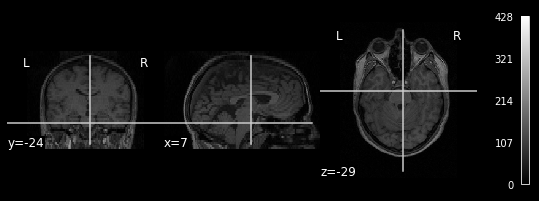

In [80]:
# Display

from nilearn.plotting import plot_anat, plot_img, plot_stat_map

plot_img(subject_data.func[0], colorbar=True, cbar_tick_format="%i")
plot_anat(subject_data.anat, colorbar=True, cbar_tick_format="%i")

In [81]:
# Builds stim pattern

from nilearn.image import concat_imgs, mean_img
import pandas as pd

# Creates 4D image

fmri_img = concat_imgs(subject_data.func)
mean_img = mean_img(fmri_img)

# extracts stimulation pattern

events = pd.read_table(subject_data["events"])
events

,onset,duration,trial_type
0,0.0,42.0,rest
1,42.0,42.0,active
2,84.0,42.0,rest
3,126.0,42.0,active
4,168.0,42.0,rest
5,210.0,42.0,active
6,252.0,42.0,rest
7,294.0,42.0,active
8,336.0,42.0,rest
9,378.0,42.0,active


In [82]:
# creates and fit the model

from nilearn.glm.first_level import FirstLevelModel

fmri_glm = FirstLevelModel(
    t_r=7,
    noise_model="ar1",
    standardize=False,
    hrf_model="spm",
    drift_model="cosine",
    high_pass=0.01,
)

fmri_glm = fmri_glm.fit(fmri_img, events)

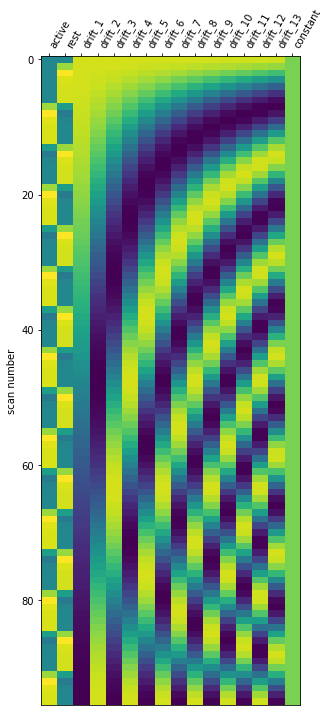

In [83]:
# Checking the model

from nilearn.plotting import plot_design_matrix

design_matrix = fmri_glm.design_matrices_[0]

plot_design_matrix(design_matrix)

plt.show()

In [84]:
# does the stats

import numpy as np

conditions = {"active": np.zeros(16), "rest": np.zeros(16)}
conditions["active"][0] = 1
conditions["rest"][1] = 1

active_minus_rest = conditions["active"] - conditions["rest"]

eff_map = fmri_glm.compute_contrast(
    active_minus_rest, output_type="effect_size"
)

z_map = fmri_glm.compute_contrast(active_minus_rest, output_type="z_score")

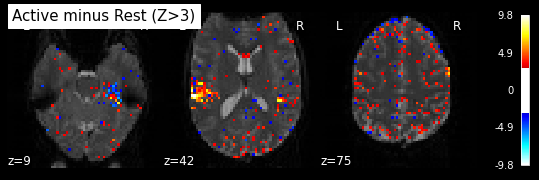

In [85]:
# plots the stats

plot_stat_map(
    z_map,
    bg_img=mean_img,
    threshold=3.0,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Active minus Rest (Z>3)",
)
plt.show()